## Name : - Darpan Gaur
## Roll Number : -  CO21BTECH11004

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set seed 23
np.random.seed(41)

In [3]:
class linear():
    def __init__(self, in_feat, out_feat):
        self.W = np.random.randn(in_feat, out_feat) # see other initialization methods
        self.b = np.zeros((1, out_feat))

    def forward(self, X):
        self.X = X
        return np.dot(X, self.W) + self.b
    
    def backward(self, grad):
        self.grad_W = np.dot(self.X.T, grad)
        self.grad_b = np.sum(grad, axis=0, keepdims=True)
        return np.dot(grad, self.W.T)
    
class tanh():
    def forward(self, X):
        self.X = X
        return np.tanh(X)
    
    def backward(self, grad):
        return grad * (1 - np.tanh(self.X)**2)
    
class sigmoid():
    def forward(self, X):
        self.X = X
        return 1/(1 + np.exp(-X))
    
    def backward(self, grad):
        return grad * (1 - 1/(1 + np.exp(-self.X))) * 1/(1 + np.exp(-self.X))  
    
class mse():
    def __init__(self):
        pass

    def forward(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    
    def backward(self, grad, y_true):
        return -2*(y_true - grad) / len(y_true)
    
class optimizer():
    def __init__(self, lr):
        self.lr = lr
        
    def step(self, layer):
        layer.W -= self.lr * layer.grad_W
        layer.b -= self.lr * layer.grad_b


class optimizer_sgd(optimizer):
    def __init__(self, lr):
        super().__init__(lr)
        
    def step(self, layer):
        layer.W -= self.lr * layer.grad_W
        layer.b -= self.lr * layer.grad_b

In [4]:
class ANN():
    def __init__(self, input_nodes=2, hidden_nodes=2, output_nodes=1, learning_rate=0.5):
        l1 = linear(input_nodes, hidden_nodes)
        # t1 = tanh()
        t1 = sigmoid()
        l2 = linear(hidden_nodes, output_nodes)
        # t2 = tanh()
        t2 = sigmoid()
        self.layers = [l1, t1, l2, t2]
        self.loss = mse()
        self.opt = optimizer(learning_rate)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def optimize(self):
        for layer in self.layers:
            if isinstance(layer, linear):
                self.opt.step(layer)
    
    def accuracy(self, y_pred, y_true):
        return np.mean(np.round(y_pred) == y_true)

    def train(self, X, y):
        y_pred = self.forward(X)
        loss = self.loss.forward(y_pred, y)
        grad = self.loss.backward(y_pred, y)
        acc = self.accuracy(y_pred, y)
        self.backward(grad)
        self.optimize()
        return loss, acc
    
    def predict(self, X):
        return self.forward(X)

    def reset(self):
        for layer in self.layers:
            if isinstance(layer, linear):
                layer.W = np.random.randn(layer.W.shape[0], layer.W.shape[1])
                layer.b = np.zeros(layer.b.shape)

In [5]:
# create dataset
def generate_data(n, operation="and", noise=0.05, split=0.8):
    X = np.random.randint(0, 2, (n, 2))
    if (operation == "and"):
        y = np.logical_and(X[:, 0], X[:, 1]).reshape(-1, 1)
    elif (operation == "or"):
        y = np.logical_or(X[:, 0], X[:, 1]).reshape(-1, 1)
    elif (operation == "xor"):
        y = np.logical_xor(X[:, 0], X[:, 1]).reshape(-1, 1)
    else:
        raise ValueError("Invalid operation")
    
    X_noise = np.random.normal(0, noise, (n, 2))
    X = X + X_noise
    # apply threshold
    # X[X > 0.5] = 1
    # X[X <= 0.5] = 0
    # print(X)
    # y = np.logical_and(X[:, 0], X[:, 1]).reshape(-1, 1)
    y = y.astype(int)
    X_train = X[:int(n*split)]
    y_train = y[:int(n*split)]
    X_test = X[int(n*split):]
    y_test = y[int(n*split):]
    return X_train, y_train, X_test, y_test

In [6]:
# get loss and accuracy during train
def train(model, X_train, y_train, X_test, y_test, epochs, show_stats=False):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    for epoch in range(epochs):
        loss, acc = model.train(X_train, y_train)
        train_loss.append(loss)
        train_acc.append(acc)

        y_pred = model.predict(X_test)
        loss_t = model.loss.forward(y_pred, y_test)
        acc_t = model.accuracy(y_pred, y_test)
        test_loss.append(loss_t)
        test_acc.append(acc_t)

        if (show_stats): print(f'Epoch {epoch+1}/{epochs} - train loss: {loss:.4f} - train acc: {acc:.4f} - test loss: {loss_t:.4f} - test acc: {acc_t:.4f}')
    return train_loss, train_acc, test_loss, test_acc

In [7]:
# data generation
X_train_or, y_train_or, X_test_or, y_test_or = generate_data(100, operation="or")
X_train_and, y_train_and, X_test_and, y_test_and = generate_data(100, operation="and")
X_train_xor, y_train_xor, X_test_xor, y_test_xor = generate_data(100, operation="xor")

In [8]:
# train model

lr_and = 0.3
epoch_and = 1000
model_and = ANN(2, 2, 1, learning_rate=lr_and)
train_loss_and, train_acc_and, test_loss_and, test_acc_and = train(model_and, X_train_and, y_train_and, X_test_and, y_test_and, epoch_and)

lr_or = 0.3
epoch_or = 1000
model_or = ANN(2, 2, 1, learning_rate=lr_or)
train_loss_or, train_acc_or, test_loss_or, test_acc_or = train(model_or, X_train_or, y_train_or, X_test_or, y_test_or, epoch_or)

lr_xor = 0.5   
epoch_xor = 3000
model_xor = ANN(2, 2, 1, learning_rate=lr_xor)
train_loss_xor, train_acc_xor, test_loss_xor, test_acc_xor = train(model_xor, X_train_xor, y_train_xor, X_test_xor, y_test_xor, epoch_xor)

## Part (a) Training and testing loss over iterations

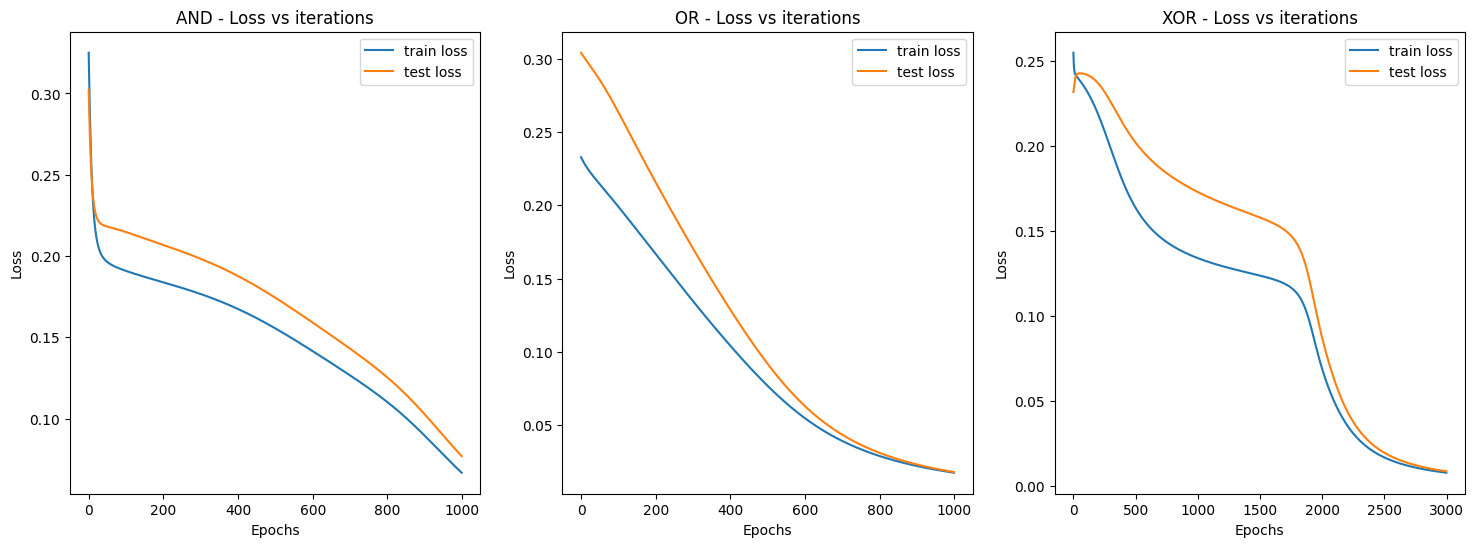

In [9]:

plt.figure(figsize=(18, 6))

# plot loss and
plt.subplot(1, 3, 1)
plt.plot(train_loss_and, label='train loss')
plt.plot(test_loss_and, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('AND - Loss vs iterations')
plt.legend()

# plot loss or
plt.subplot(1, 3, 2)
plt.plot(train_loss_or, label='train loss')
plt.plot(test_loss_or, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('OR - Loss vs iterations')
plt.legend()

# plot loss xor
plt.subplot(1, 3, 3)
plt.plot(train_loss_xor, label='train loss')
plt.plot(test_loss_xor, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('XOR - Loss vs iterations')
plt.legend()
plt.show()

## Part (b) Training and testing accuracy over iterations

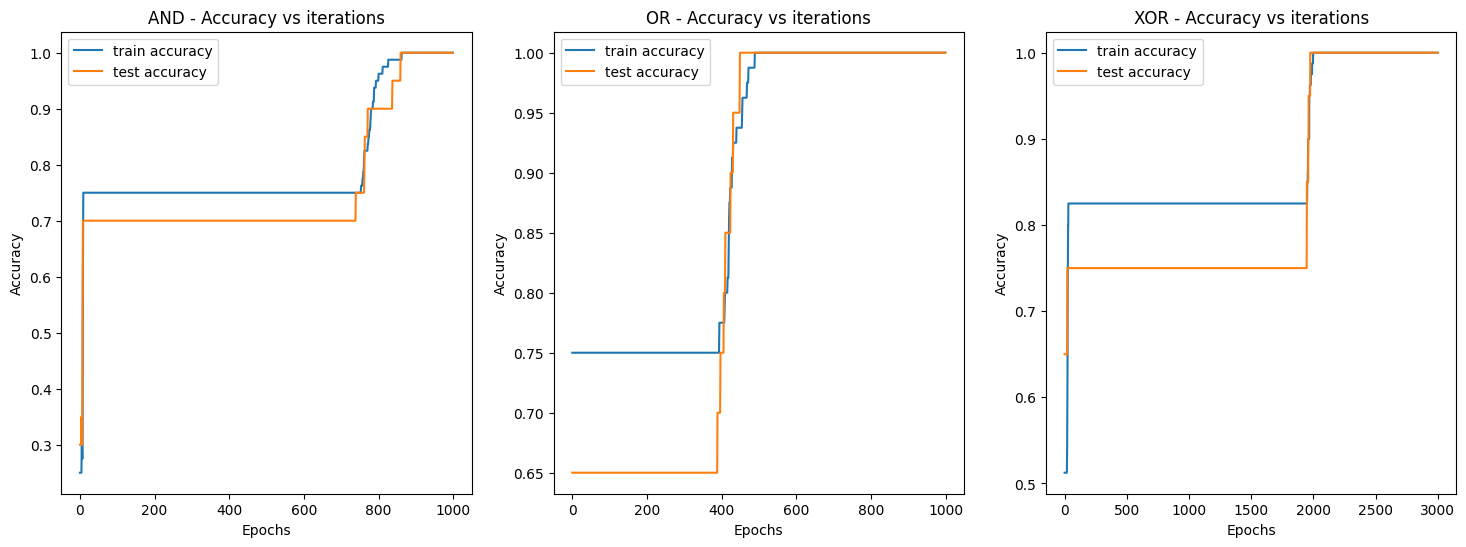

In [10]:

plt.figure(figsize=(18, 6))

# plot accuracy and
plt.subplot(1, 3, 1)
plt.plot(train_acc_and, label='train accuracy')
plt.plot(test_acc_and, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('AND - Accuracy vs iterations')
plt.legend()

# plot accuracy or
plt.subplot(1, 3, 2)
plt.plot(train_acc_or, label='train accuracy')
plt.plot(test_acc_or, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('OR - Accuracy vs iterations')
plt.legend()

# plot accuracy xor
plt.subplot(1, 3, 3)
plt.plot(train_acc_xor, label='train accuracy')
plt.plot(test_acc_xor, label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('XOR - Accuracy vs iterations')
plt.legend()
plt.show()

- As the number of iterations increases, the accuracy increases and getting around 100% accuracy in all the cases.
- in gerneral for 'OR' and 'AND' operators convergence is faster than 'XOR' operator.
- As per graphs
    - Around 900 iterations for 'AND' operator reached 100% accuracy.
    - Around 500 iterations for 'OR' operator reached 100% accuracy.
    - Around 2000 iterations for 'XOR' operator reached 100% accuracy.
- **Point to note that this convergene also depends on weight initialization (here random) and learning rate.**

## Part (c) Print the training and test loss and accuracy at the end of training.

In [11]:

print("AND")
print(f"EPOCHS: {epoch_and} - LEARNING RATE: {lr_and}")
print(f"Train loss: {train_loss_and[-1]:.4f} - Train accuracy: {train_acc_and[-1]:.4f}")
print(f"Test loss: {test_loss_and[-1]:.4f} - Test accuracy: {test_acc_and[-1]:.4f}")

print("\nOR")
print(f"EPOCHS: {epoch_or} - LEARNING RATE: {lr_or}")
print(f"Train loss: {train_loss_or[-1]:.4f} - Train accuracy: {train_acc_or[-1]:.4f}")
print(f"Test loss: {test_loss_or[-1]:.4f} - Test accuracy: {test_acc_or[-1]:.4f}")

print("\nXOR")
print(f"EPOCHS: {epoch_xor} - LEARNING RATE: {lr_xor}")
print(f"Train loss: {train_loss_xor[-1]:.4f} - Train accuracy: {train_acc_xor[-1]:.4f}")
print(f"Test loss: {test_loss_xor[-1]:.4f} - Test accuracy: {test_acc_xor[-1]:.4f}")

AND
EPOCHS: 1000 - LEARNING RATE: 0.3
Train loss: 0.0668 - Train accuracy: 1.0000
Test loss: 0.0770 - Test accuracy: 1.0000

OR
EPOCHS: 1000 - LEARNING RATE: 0.3
Train loss: 0.0174 - Train accuracy: 1.0000
Test loss: 0.0179 - Test accuracy: 1.0000

XOR
EPOCHS: 3000 - LEARNING RATE: 0.5
Train loss: 0.0080 - Train accuracy: 1.0000
Test loss: 0.0088 - Test accuracy: 1.0000


- Refer to graphs for intermediate loss and accuracy values.
- Here loss reported of last iteration, which is 1000 for 'OR' and 'AND' operators and 3000 for 'XOR' operator.

## Part (d) Deterministic Gradient Descent: Experiment with n

In [12]:

def calc_stats(operation, num_samples, lr, epochs):
    X_train, y_train, X_test, y_test = generate_data(1000, operation=operation)
    stats = []
    for n in num_samples:
        xt = X_train[:n]
        yt = y_train[:n]
        model = ANN(2, 2, 1, learning_rate=lr)
        train_loss, train_acc, test_loss, test_acc = train(model, xt, yt, X_test, y_test, epochs)
        model.reset()
        stats.append([train_loss, train_acc, test_loss, test_acc])
    return stats

# plot 4 graphs, train loss, train accuracy, test loss, test accuracy
def plot_stats(operation, num_samples, stats):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    for i, n in enumerate(num_samples):
        plt.plot(stats[i][0], label=f'{n} samples')
    plt.xlabel('Epochs')
    plt.ylabel('Train Loss')
    plt.title(f'{operation} - Train Loss vs iterations')
    plt.legend()

    plt.subplot(1, 4, 2)
    for i, n in enumerate(num_samples):
        plt.plot(stats[i][1], label=f'{n} samples')
    plt.xlabel('Epochs')
    plt.ylabel('Train Accuracy')
    plt.title(f'{operation} - Train Accuracy vs iterations')
    plt.legend()

    plt.subplot(1, 4, 3)
    for i, n in enumerate(num_samples):
        plt.plot(stats[i][2], label=f'{n} samples')
    plt.xlabel('Epochs')
    plt.ylabel('Test Loss')
    plt.title(f'{operation} - Test Loss vs iterations')
    plt.legend()

    plt.subplot(1, 4, 4)
    for i, n in enumerate(num_samples):
        plt.plot(stats[i][3], label=f'{n} samples')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.title(f'{operation} - Test Accuracy vs iterations')
    plt.legend()

    plt.show()



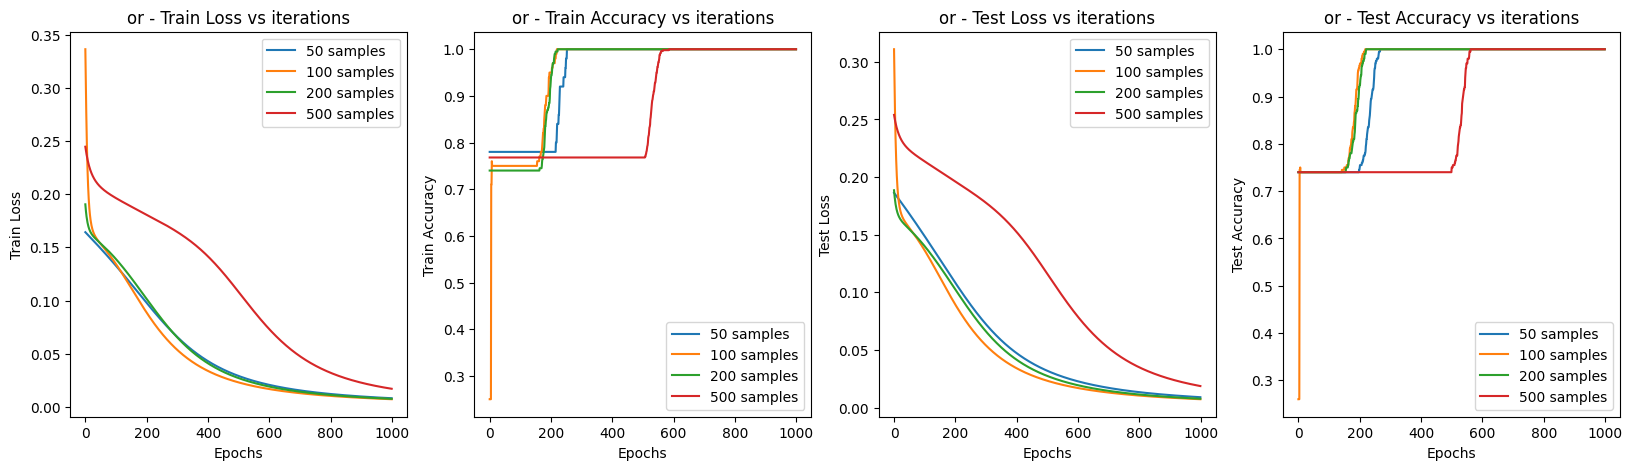

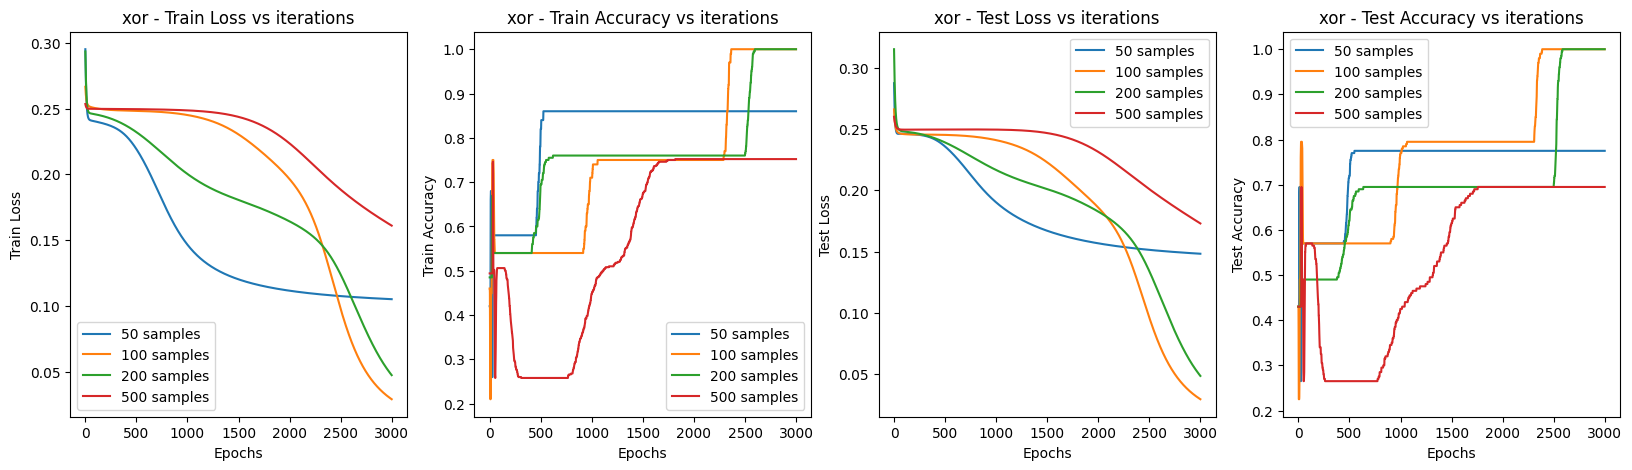

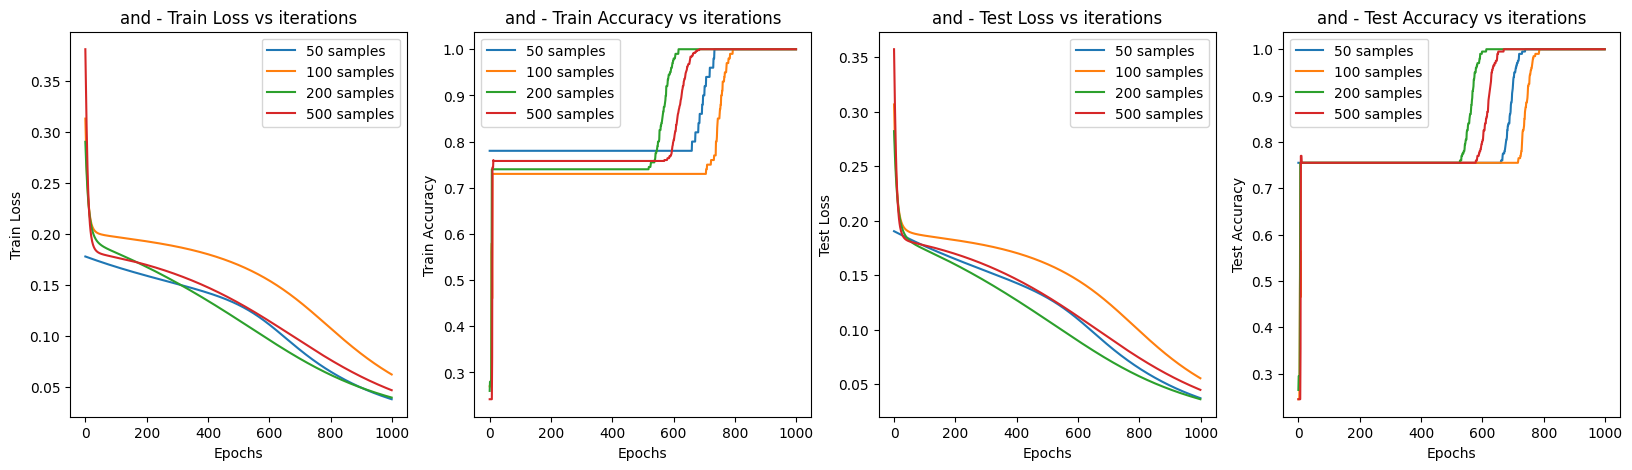

In [13]:
num_samples = [50, 100, 200, 500]
lr = 0.3
epochs = 1000
epochs_xor = 3000
or_stats = calc_stats("or", num_samples, lr, epochs=epochs)
plot_stats("or", num_samples, or_stats)

xor_stats = calc_stats("xor", num_samples, lr, epochs=epochs_xor)
plot_stats("xor", num_samples, xor_stats)

and_stats = calc_stats("and", num_samples, lr, epochs=epochs)
plot_stats("and", num_samples, and_stats)

## Part (e) Stochastic Gradient Descent

In [14]:

def train_sgd(model, X_train, y_train, X_test, y_test, epochs, batch_size, show_stats=False):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    for epoch in range(epochs):
        tl, tacc = [], []
        # random shuffle
        idx = np.random.permutation(len(X_train))
        X_train = X_train[idx]
        y_train = y_train[idx]

        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            loss, acc = model.train(X_batch, y_batch)
            tl.append(loss)
            tacc.append(acc)
        loss = np.mean(tl)
        acc = np.mean(tacc)
        train_loss.append(loss)
        train_acc.append(acc)

        y_pred = model.predict(X_test)
        loss_t = model.loss.forward(y_pred, y_test)
        acc_t = model.accuracy(y_pred, y_test)
        test_loss.append(loss_t)
        test_acc.append(acc_t)

        if (show_stats): print(f'Epoch {epoch+1}/{epochs} - train loss: {loss:.4f} - train acc: {acc:.4f} - test loss: {loss_t:.4f} - test acc: {acc_t:.4f}')

    return train_loss, train_acc, test_loss, test_acc

In [15]:
def calc_stats_sgd(operation, batch_sizes, n, lr, epochs):
    X_train, y_train, X_test, y_test = generate_data(200, operation=operation)
    stats = []
    for bs in batch_sizes:
        model = ANN(2, 2, 1, learning_rate=lr)
        train_loss, train_acc, test_loss, test_acc = train_sgd(model, X_train[:n], y_train[:n], X_test, y_test, epochs, bs)
        model.reset()
        stats.append([train_loss, train_acc, test_loss, test_acc])
    return stats


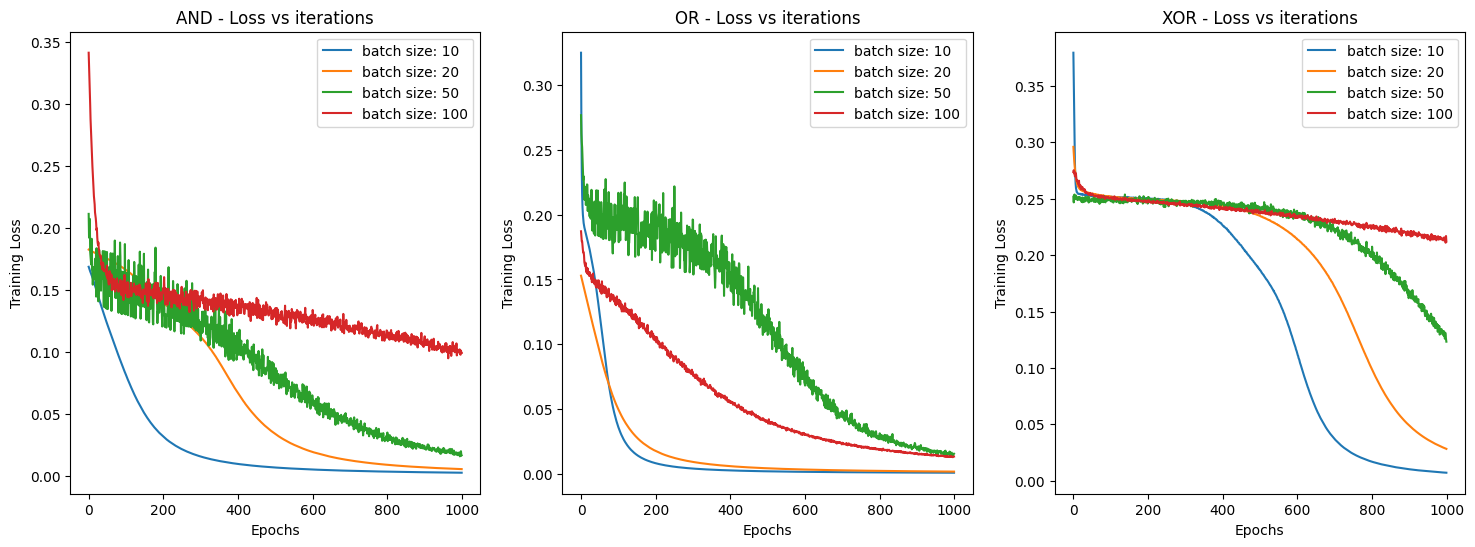

In [16]:
# model initialization and training

batch_sizes = [10, 20, 50, 100]
lr = 0.1
epochs = 1000
n = 200

or_stats_sgd = calc_stats_sgd("or", batch_sizes, n, lr, epochs=epochs)
and_stats_sgd = calc_stats_sgd("and", batch_sizes, n, lr, epochs=epochs)
xor_stats_sgd = calc_stats_sgd("xor", batch_sizes, n, lr, epochs=epochs)

plt.figure(figsize=(18, 6))

# plot loss and
plt.subplot(1, 3, 1)
for i, bs in enumerate(batch_sizes):
    plt.plot(and_stats_sgd[i][0], label=f'batch size: {bs}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('AND - Loss vs iterations')
plt.legend()

# plot loss or
plt.subplot(1, 3, 2)
for i, bs in enumerate(batch_sizes):
    plt.plot(or_stats_sgd[i][0], label=f'batch size: {bs}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('OR - Loss vs iterations')
plt.legend()

# plot loss xor
plt.subplot(1, 3, 3)
for i, bs in enumerate(batch_sizes):
    plt.plot(xor_stats_sgd[i][0], label=f'batch size: {bs}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('XOR - Loss vs iterations')
plt.legend()
plt.show()


- For small value of m (batch_size) loss converges faster than for large value of m.
- In case of 'AND'
    - for m=10, converges around 400 iterations
    - for m=20, converges around 600 iterations
    - for m=50, converges around 1000 iterations
- In case of 'OR'
    - for m=10, converges around 200 iterations
    - for m=20, converges around 450 iterations
    - for m=100, converges around 900 iterations
- In case of 'XOR'
    - for m=10, converges around 900 iterations
    - other values of m converges after 1000 iterations

- **Point to note that this convergene also depends on weight initialization (here random) and learning rate.**
    